In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [5]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

612

In [6]:
# Import the datetime module from the datetime library.
from datetime import datetime
# Import the requests library.
import requests
# Import the API key.
from config import weather_api_key

In [7]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=cd2a5fb93edc5619ae9c7da7a5d25c8c


In [8]:
# Create an empty list to hold the weather data.
city_data = []
city_data_new_df = [] #Creating an empty Data Frame to hold the array of dcitionaries into a data frame.
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

Beginning Data Retrieval     
-----------------------------


In [9]:
# Loop through all the cities in our list.
for i in range(len(cities)):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + cities[i]
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Processing Record 1 of Set 13 | georgetown
Processing Record 2 of Set 13 | fukue
Processing Record 3 of Set 13 | puerto ayora
Processing Record 4 of Set 13 | hilo
Processing Record 5 of Set 13 | antofagasta
Processing Record 6 of Set 13 | chuy
Processing Record 7 of Set 13 | butaritari
Processing Record 8 of Set 13 | cabo san lucas
Processing Record 9 of Set 13 | bredasdorp
Processing Record 10 of Set 13 | jamestown
Processing Record 11 of Set 13 | faanui
Processing Record 12 of Set 13 | souillac
Processing Record 13 of Set 13 | angren
Processing Record 14 of Set 13 | port elizabeth
Processing Record 15 of Set 13 | clyde river
Processing Record 16 of Set 13 | raleigh
Processing Record 17 of Set 13 | cape town
Processing Record 18 of Set 13 | mahebourg
Processing Record 19 of Set 13 | barrow
Processing Record 20 of Set 13 | mahajanga
Processing Record 21 of Set 13 | cabedelo
Processing Record 22 of Set 13 | taolanaro
City not found. Skipping...
Processing Record 23 of Set 13 | caceres
P

Processing Record 34 of Set 16 | san jeronimo
Processing Record 35 of Set 16 | mys shmidta
City not found. Skipping...
Processing Record 36 of Set 16 | ugoofaaru
Processing Record 37 of Set 16 | adrar
Processing Record 38 of Set 16 | bannu
Processing Record 39 of Set 16 | zyryanskoye
Processing Record 40 of Set 16 | paamiut
Processing Record 41 of Set 16 | solovetskiy
City not found. Skipping...
Processing Record 42 of Set 16 | batagay
Processing Record 43 of Set 16 | vila franca do campo
Processing Record 44 of Set 16 | ca mau
Processing Record 45 of Set 16 | san ramon de la nueva oran
Processing Record 46 of Set 16 | naze
Processing Record 47 of Set 16 | japura
Processing Record 48 of Set 16 | filadelfia
Processing Record 49 of Set 16 | yulara
Processing Record 50 of Set 16 | kemin
Processing Record 1 of Set 17 | severo-kurilsk
Processing Record 2 of Set 17 | orlik
Processing Record 3 of Set 17 | ngukurr
City not found. Skipping...
Processing Record 4 of Set 17 | ilulissat
Processing

Processing Record 15 of Set 20 | varkaus
Processing Record 16 of Set 20 | camopi
Processing Record 17 of Set 20 | pyinmana
Processing Record 18 of Set 20 | kautokeino
Processing Record 19 of Set 20 | hambantota
Processing Record 20 of Set 20 | lebu
Processing Record 21 of Set 20 | qaqortoq
Processing Record 22 of Set 20 | chabahar
Processing Record 23 of Set 20 | udachnyy
Processing Record 24 of Set 20 | kholodnyy
Processing Record 25 of Set 20 | metehara
City not found. Skipping...
Processing Record 26 of Set 20 | jaipur hat
City not found. Skipping...
Processing Record 27 of Set 20 | itaituba
Processing Record 28 of Set 20 | sorvag
City not found. Skipping...
Processing Record 29 of Set 20 | doctor juan leon mallorquin
Processing Record 30 of Set 20 | mana
Processing Record 31 of Set 20 | palana
Processing Record 32 of Set 20 | portland
Processing Record 33 of Set 20 | erdaojiang
Processing Record 34 of Set 20 | pangoa
Processing Record 35 of Set 20 | pimentel
Processing Record 36 of

Processing Record 3 of Set 24 | agaro
Processing Record 4 of Set 24 | rocha
Processing Record 5 of Set 24 | bokoro
Processing Record 6 of Set 24 | zhigansk
Processing Record 7 of Set 24 | palabuhanratu
City not found. Skipping...
Processing Record 8 of Set 24 | bryan
Processing Record 9 of Set 24 | bani
Processing Record 10 of Set 24 | sinkat
City not found. Skipping...
Processing Record 11 of Set 24 | katete
Processing Record 12 of Set 24 | weiser
Processing Record 13 of Set 24 | luxor
Processing Record 14 of Set 24 | louisbourg
City not found. Skipping...
Processing Record 15 of Set 24 | longhua
Processing Record 16 of Set 24 | markala
Processing Record 17 of Set 24 | kalmunai
Processing Record 18 of Set 24 | marovoay
Processing Record 19 of Set 24 | kanungu
Processing Record 20 of Set 24 | bealanana
Processing Record 21 of Set 24 | fort dodge
Processing Record 22 of Set 24 | lumphat
Processing Record 23 of Set 24 | carauari
Processing Record 24 of Set 24 | fukuma
Processing Record 2

In [10]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Georgetown,5.4112,100.3354,78.80,83,20,2.30,MY,2021-02-07 01:15:11
1,Fukue,32.6881,128.8419,53.60,71,20,3.44,JP,2021-02-07 01:17:46
2,Puerto Ayora,-0.7393,-90.3518,77.00,93,52,7.40,EC,2021-02-07 01:16:40
3,Hilo,19.7297,-155.0900,78.80,53,75,5.75,US,2021-02-07 01:16:34
4,Antofagasta,-23.6500,-70.4000,66.20,77,75,8.05,CL,2021-02-07 01:16:35
5,Chuy,-33.6971,-53.4616,67.05,88,0,9.71,UY,2021-02-07 01:17:03
6,Butaritari,3.0707,172.7902,81.14,80,44,20.54,KI,2021-02-07 01:17:46
7,Cabo San Lucas,22.8909,-109.9124,71.01,60,20,8.05,MX,2021-02-07 01:14:27
8,Bredasdorp,-34.5322,20.0403,66.20,88,96,3.44,ZA,2021-02-07 01:16:45
9,Jamestown,42.0970,-79.2353,17.60,49,1,6.91,US,2021-02-07 01:16:30


In [11]:
city_data_df.dtypes

City           object
Lat           float64
Lng           float64
Max Temp      float64
Humidity        int64
Cloudiness      int64
Wind Speed    float64
Country        object
Date           object
dtype: object

In [12]:
# Setting the above output in a given specific coluumn order
#new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
#city_data_new_df = city_data_new_df["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
#city_data_new_df.head()

In [13]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [14]:
# Extract relevant fields from the DataFrame for plotting the scatter chart
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [15]:
# Import the time module.
import time
# Get today's date in seconds.
today = time.time()
today

1612660703.6326988

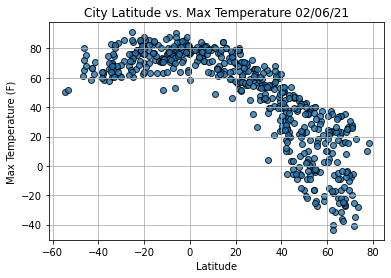

In [16]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

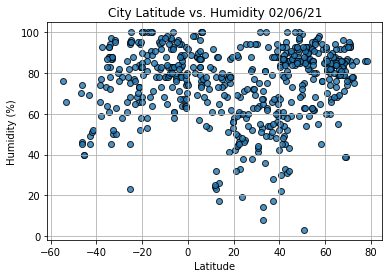

In [17]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

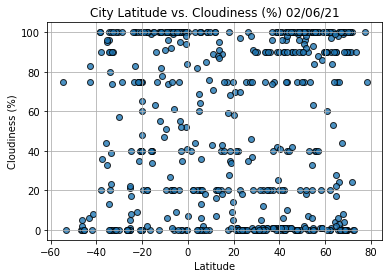

In [18]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

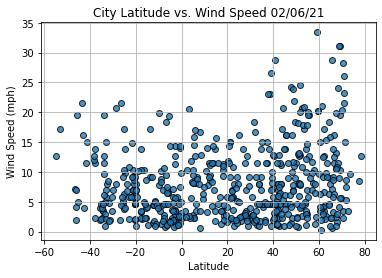

In [19]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [63]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
    #linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.title(title)
    plt.show()
    

In [21]:
#return data for latitudes greater then zero
city_data_df.loc[(city_data_df["Lat"] >= 0)]
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Georgetown,5.4112,100.3354,78.80,83,20,2.30,MY,2021-02-07 01:15:11
1,Fukue,32.6881,128.8419,53.60,71,20,3.44,JP,2021-02-07 01:17:46
3,Hilo,19.7297,-155.0900,78.80,53,75,5.75,US,2021-02-07 01:16:34
6,Butaritari,3.0707,172.7902,81.14,80,44,20.54,KI,2021-02-07 01:17:46
7,Cabo San Lucas,22.8909,-109.9124,71.01,60,20,8.05,MX,2021-02-07 01:14:27


In [22]:
city_data_df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Georgetown,5.4112,100.3354,78.80,83,20,2.30,MY,2021-02-07 01:15:11
1,Fukue,32.6881,128.8419,53.60,71,20,3.44,JP,2021-02-07 01:17:46
2,Puerto Ayora,-0.7393,-90.3518,77.00,93,52,7.40,EC,2021-02-07 01:16:40
3,Hilo,19.7297,-155.0900,78.80,53,75,5.75,US,2021-02-07 01:16:34
4,Antofagasta,-23.6500,-70.4000,66.20,77,75,8.05,CL,2021-02-07 01:16:35
...,...,...,...,...,...,...,...,...,...
548,Markova,48.6758,24.4138,23.63,97,100,6.76,UA,2021-02-07 01:18:23
549,Macheng,31.1783,115.0319,53.01,75,0,2.82,CN,2021-02-07 01:18:23
550,Maragogi,-9.0122,-35.2225,77.79,84,100,8.25,BR,2021-02-07 01:18:23
551,Orocue,4.7912,-71.3354,84.15,57,69,8.14,CO,2021-02-07 01:18:23


In [23]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

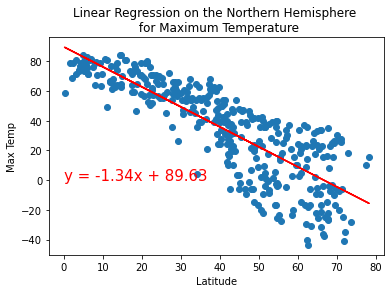

In [64]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for Maximum Temperature', 'Max Temp',(0,0))

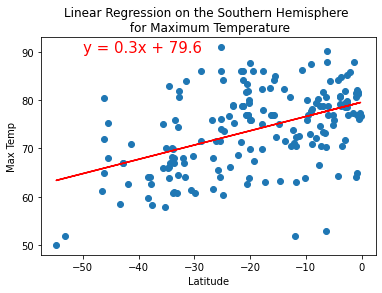

In [67]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for Maximum Temperature', 'Max Temp',(-50,90))

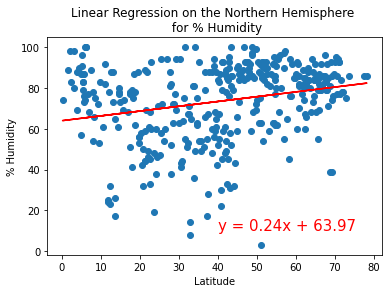

In [68]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for % Humidity', '% Humidity',(40,10))

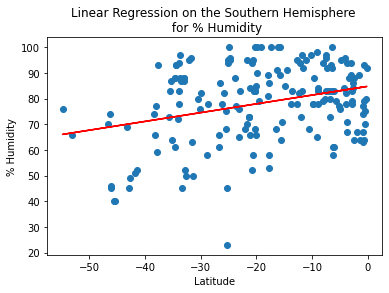

In [69]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values, 'Linear Regression on the Southern Hemisphere \n for % Humidity','% Humidity',(-50,15))

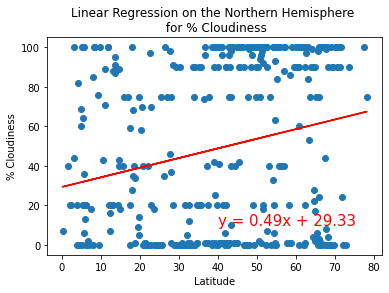

In [70]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values, 'Linear Regression on the Northern Hemisphere \n for % Cloudiness', '% Cloudiness',(40,10))

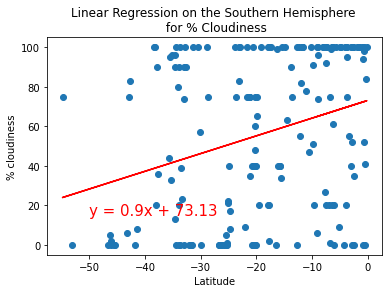

In [71]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values, 'Linear Regression on the Southern Hemisphere \n for % Cloudiness','% cloudiness',(-50,15))

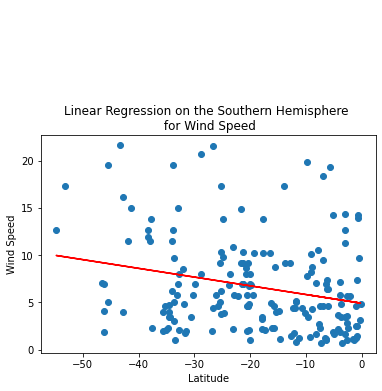

In [72]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,'Linear Regression on the Southern Hemisphere \n for Wind Speed', 'Wind Speed',(-50,35))